In [211]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

import datetime
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sfdstscoring/train.csv
/kaggle/input/sfdstscoring/test.csv
/kaggle/input/sfdstscoring/sample_submission1.csv


Выгружаем данные.

In [212]:
data = pd.read_csv('/kaggle/input/sfdstscoring/train.csv')
data_test = pd.read_csv('/kaggle/input/sfdstscoring/test.csv')

In [213]:
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [214]:
data_test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [216]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

Видим пропуски в колонке education.

In [217]:
data.isna().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [218]:
data_test.isna().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

**Предобработка данных**

<AxesSubplot:>

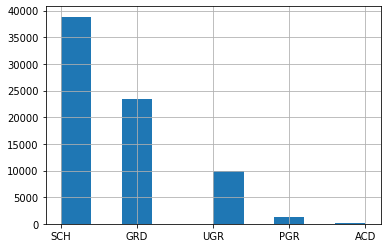

In [219]:
data.education.hist()

In [220]:
data.education.value_counts(normalize=True)

SCH    0.528765
GRD    0.317926
UGR    0.133566
PGR    0.017104
ACD    0.002640
Name: education, dtype: float64

In [221]:
data_test.education.value_counts(normalize=True)

SCH    0.528996
GRD    0.315192
UGR    0.136326
PGR    0.016806
ACD    0.002681
Name: education, dtype: float64

Видим, что SCH превалирует, а значит можно заменить пропуски на это значение

In [222]:
data.education = data.education.fillna("SCH")
data_test.education = data.education.fillna("SCH")

Приводим даты для удобства в числовой формат.

In [223]:
data["app_date"] = data["app_date"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))
data_test["app_date"] = data_test["app_date"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))

Делаем списки по типам (как вы в модуле своём и показывали).

In [224]:
# binary
bin_cols = ["sex", "car", "car_type", "foreign_passport", "good_work"]

# categorical
cat_cols = ["education", "home_address", "work_address", "sna", "first_time"]

# numeric
num_cols = ["age", "decline_app_cnt", "income", "bki_request_cnt", "score_bki", \
            "region_rating"]

Рассмотрим бинарные признаки.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


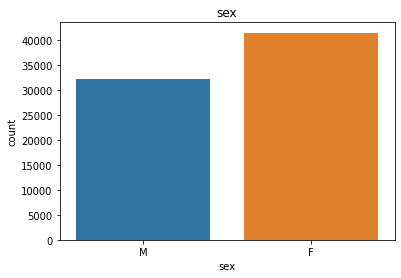

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


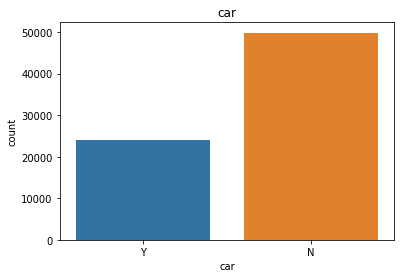

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


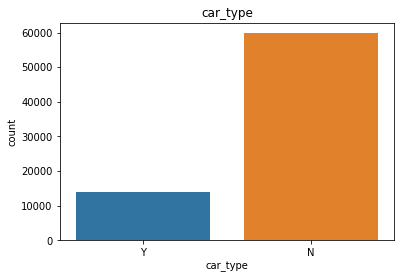

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


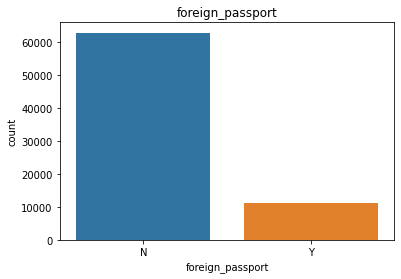

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


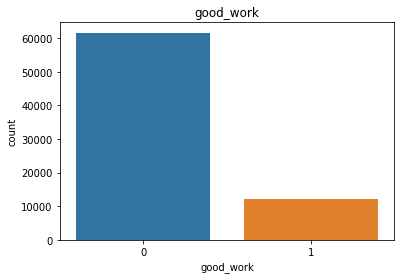

In [225]:
for column in bin_cols:
    plt.figure()
    sns.countplot(data[column])
    plt.title(column)
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


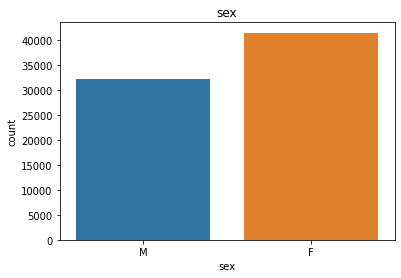

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


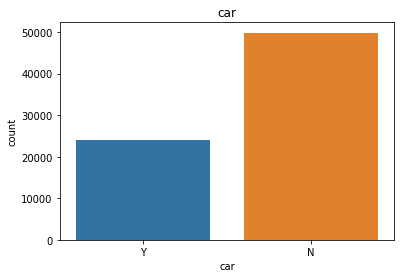

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


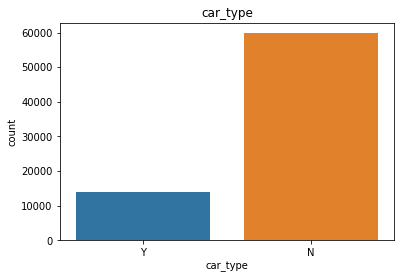

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


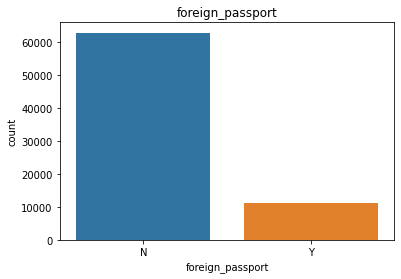

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


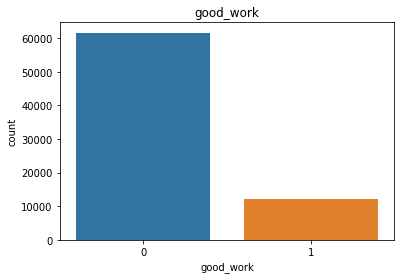

In [226]:
for column in bin_cols:
    plt.figure()
    sns.countplot(data[column])
    plt.title(column)
    plt.show()

Выводы:
- Данные без перекосов
- Кредиты берут в большинстве женщины;
- Люди с плохой работой;
- Чаще всего без автомобиля и загранпаспорта.

Числовые признаки:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


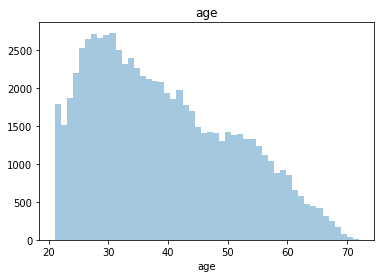

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


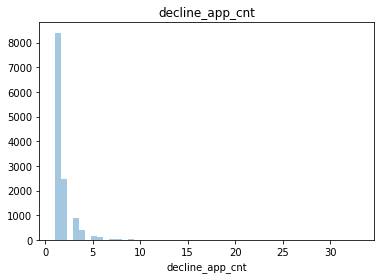

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


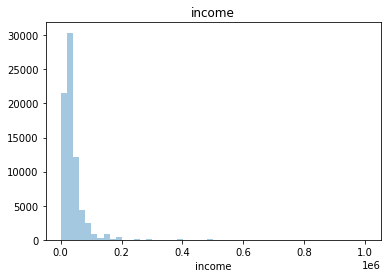

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


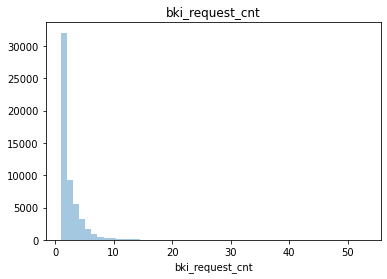

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


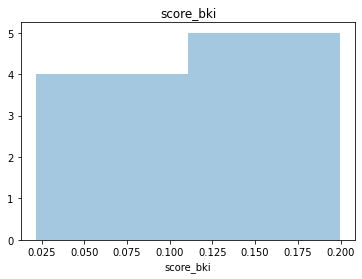

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


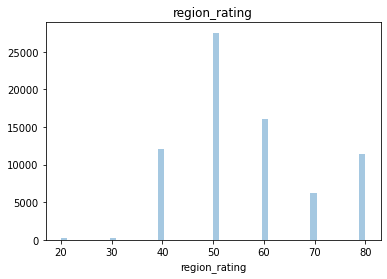

In [227]:
for i in num_cols:
    plt.figure()
    sns.distplot(data[i][data[i] > 0], kde = False, rug=False)
    plt.title(i)
    plt.show()

In [228]:
# используем логарифмирование к сдвинутым полям
for i in ["age", "decline_app_cnt", "income", "bki_request_cnt"]:
    data[i] = np.log(data[i] + 1)
    data_test[i] = np.log(data[i] + 1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


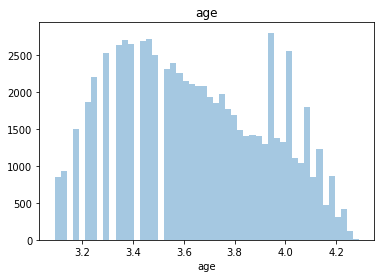

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


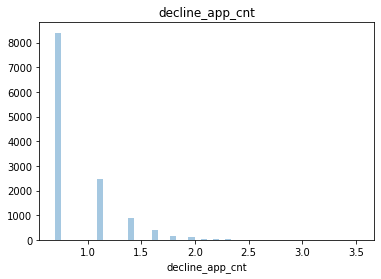

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


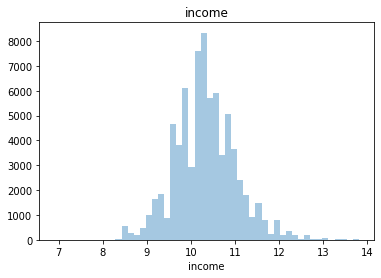

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


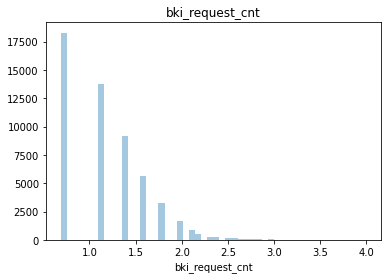

In [229]:
for i in ["age", "decline_app_cnt", "income", "bki_request_cnt"]:
    plt.figure()
    sns.distplot(data[i][data[i] > 0], kde = False, rug=False)
    plt.title(i)
    plt.show()

<AxesSubplot:>

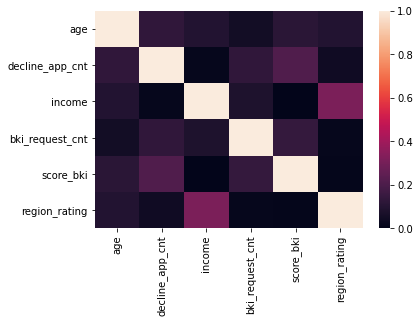

In [230]:
# посмотрим на корреляцию Пирсона
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

В основном признаки скоррелированы слабо, кроме income и region_ratings

<AxesSubplot:>

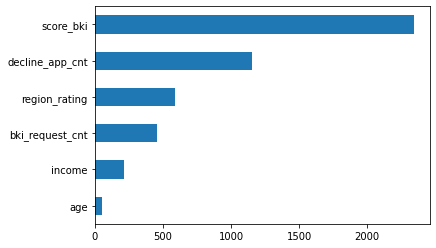

In [232]:
imp_num = pd.Series(f_classif(data[num_cols], data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Вывод:
- важные признаки: score_bki и decline_app_cnt

Категориальные признаки:

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


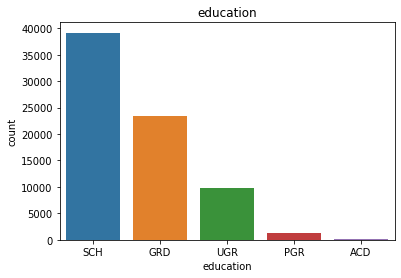

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


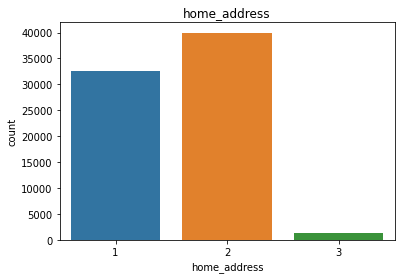

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


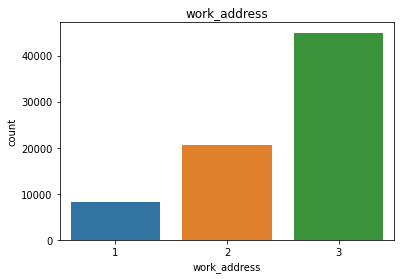

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


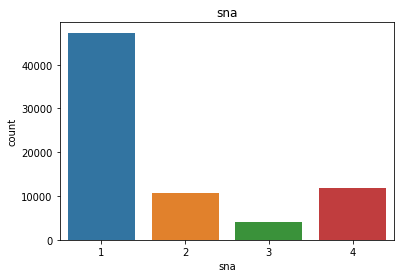

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


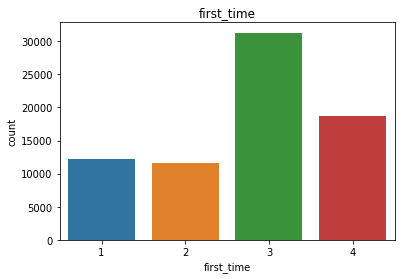

In [233]:
for column in cat_cols:
    plt.figure()
    sns.countplot(data[column])
    plt.title(column)
    plt.show()

Данные относительно равномерны. Перекодируем признаки:

In [236]:
# бинарные
label_encoder = LabelEncoder()
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    data_test[column] = label_encoder.fit_transform(data_test[column])
    print(column, dict(enumerate(label_encoder.classes_)))

sex {0: 'F', 1: 'M'}
car {0: 'N', 1: 'Y'}
car_type {0: 'N', 1: 'Y'}
foreign_passport {0: 'N', 1: 'Y'}
good_work {0: 0, 1: 1}


In [237]:
# категориальные
label_encoder = LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education'])
data_test['education'] = label_encoder.fit_transform(data_test['education'])
print(dict(enumerate(label_encoder.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}


In [238]:
# удалим не нужные поля
data = data.drop(["client_id", "app_date"], axis = 1)

Создаём новые условия:

In [239]:
data["car_ext"] = data.car * 2 - data.car_type
data_test["car_ext"] = data_test.car * 2 - data_test.car_type

data["edu_work"] = data.education * 2 + data.good_work
data_test["edu_work"] = data_test.education * 2 + data_test.good_work

data["edu_car"] = data.education * data.car
data_test["edu_car"] = data_test.education * data_test.car

data["edu_pass_income"] = ((data.education * data.foreign_passport) + data.income) / 5
data_test["edu_pass_income"] = ((data_test.education * data_test.foreign_passport) + data_test.income) / 5


In [240]:
data.head()

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,work_address,income,sna,first_time,foreign_passport,default,car_ext,edu_work,edu_car,edu_pass_income
0,3,1,4.143135,1,1,0.000000,0,-2.008753,0.693147,50,...,2,9.798183,4,1,0,0,1,6,3,1.959637
1,3,0,4.094345,0,0,0.000000,0,-1.532276,1.386294,50,...,3,9.852247,4,1,0,0,0,6,0,1.970449
2,3,1,3.258097,1,0,1.098612,0,-1.408142,0.693147,80,...,2,10.308986,1,4,1,0,2,6,3,2.661797
3,3,0,3.988984,0,0,0.000000,0,-2.057471,1.098612,50,...,3,9.210440,1,3,0,0,0,6,0,1.842088
4,1,1,3.891820,0,0,0.000000,1,-1.244723,0.693147,60,...,3,10.308986,1,4,1,0,0,3,0,2.261797


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/sit

<AxesSubplot:>

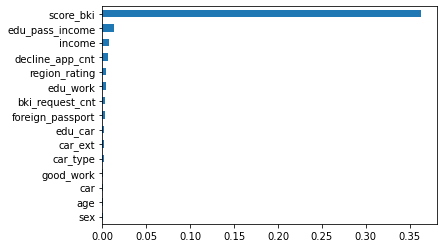

In [241]:
# посмотрим на значимость признаков
num_cols.append('car_ext')
num_cols.append('edu_work')
num_cols.append('edu_car')
num_cols.append('edu_pass_income')

imp_cat = pd.Series(mutual_info_classif(data[bin_cols + num_cols], data["default"],
                                     discrete_features=True), index = bin_cols + num_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

**Подготовка к обучению**

In [242]:
# Новые колонки для категорий
X_cat = OneHotEncoder(sparse = False).fit_transform(data[cat_cols].values)
Y_cat = OneHotEncoder(sparse = False).fit_transform(data_test[cat_cols].values)

In [243]:
# Стандартизация
X_num = StandardScaler().fit_transform(data[num_cols].values)
Y_num = StandardScaler().fit_transform(data_test[num_cols].values)

In [244]:
# Объединяем

X = np.hstack([X_num, data[bin_cols].values, X_cat])
Y = data["default"].values

X_test = np.hstack([Y_num, data_test[bin_cols].values, Y_cat])
id_ = data_test['client_id']

In [245]:
# поделим на обучающую и валидационную
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.20, random_state=42)

In [246]:
# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 6, 15)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/line

Лучшее Penalty: l2
Лучшее C: 1.0


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Обучение**

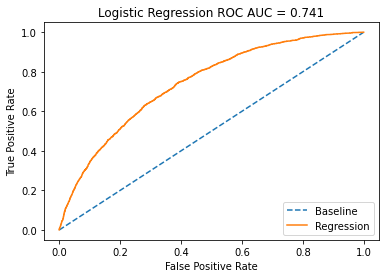

In [247]:
# Обучим модель
model = LogisticRegression(penalty="l2", \
                           C=7, \
                           fit_intercept=True, \
                           intercept_scaling=1, \
                           class_weight="balanced", \
                           solver="liblinear", \
                           max_iter=2000, \
                           multi_class="auto")

model.fit(X_train, y_train)

Y_pred = model.predict(X_valid)
Y_pred_prob = model.predict_proba(X_valid)[:,1]

y_pred_test = model.predict(X_test)
y_pred_prob_test = model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_valid, Y_pred_prob)
roc_auc = roc_auc_score(y_valid, Y_pred_prob)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Создадим новую модель.

In [248]:
model2 = LogisticRegression(penalty="l2", \
                           C=7, \
                           fit_intercept=True, \
                           intercept_scaling=1, \
                           class_weight="balanced", \
                           solver="liblinear", \
                           max_iter=2000, \
                           multi_class="auto")
model2.fit(X, Y)

LogisticRegression(C=7, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

In [249]:
y_pred_test = model2.predict(X_test)
y_pred_prob_test = model2.predict_proba(X_test)[:,1]

**Подведём итоги**

In [250]:
submission = pd.DataFrame({'client_id': id_, "default": y_pred_prob_test})
submission.to_csv('submission.csv', index=False)
submission.head()

,client_id,default
0,74835,0.260410
1,17527,0.636198
2,75683,0.523490
3,26883,0.438175
4,28862,0.157946
